In [2]:
import os

base_path = os.getcwd()

for i in range(401):
    folder_name = f"N{i}"
    folder_path = os.path.join(base_path + '/nodes', folder_name)
    
    os.makedirs(folder_path, exist_ok=True)

print("폴더 생성 완료.")


폴더 생성 완료.


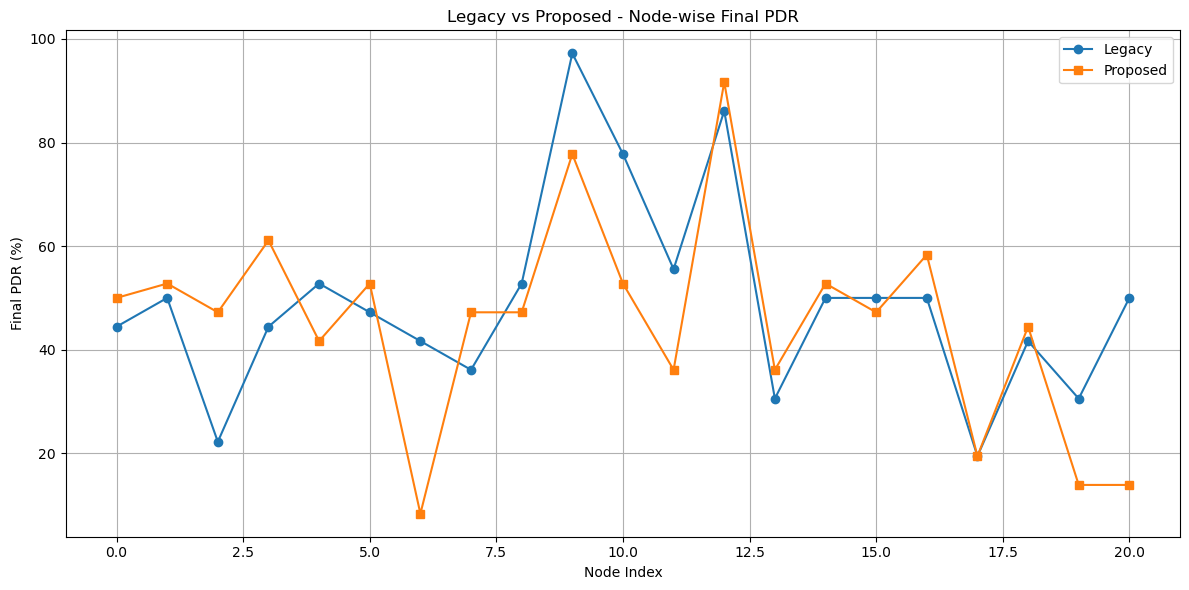

총 노드 수           : 21
같은 PDR 노드 수     : 1
제안기법이 높은 노드 : 11
Legacy가 높은 노드   : 9


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 파일 경로
lpdr_path = "LPDR.txt"
ppdr_path = "PPDR.txt"

def extract_last_values_before_20(filepath):
    final_values = []
    with open(filepath, 'r', encoding='utf-8') as f:
        prev_value = None
        for line in f:
            if ':' in line:
                time_str, value_str = line.strip().split(':')
                time = int(time_str.strip())
                value = value_str.strip()
                value = np.nan if value.lower() == 'nan' else float(value)
                if time == 20:
                    if prev_value is not None:
                        final_values.append(prev_value)
                prev_value = value
        if prev_value is not None:
            final_values.append(prev_value)
    return final_values

# 값 추출
lpdr = extract_last_values_before_20(lpdr_path)
ppdr = extract_last_values_before_20(ppdr_path)

# 노드 인덱스
nodes = list(range(len(lpdr)))

# 선 그래프
plt.figure(figsize=(12, 6))
plt.plot(nodes, lpdr, label="Legacy", marker='o', linestyle='-')
plt.plot(nodes, ppdr, label="Proposed", marker='s', linestyle='-')
plt.xlabel("Node Index")
plt.ylabel("Final PDR (%)")
plt.title("Legacy vs Proposed - Node-wise Final PDR")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 비교 통계
same = 0
proposed_higher = 0
legacy_higher = 0

for l, p in zip(lpdr, ppdr):
    if np.isnan(l) or np.isnan(p):
        continue
    if abs(l - p) < 1e-6:
        same += 1
    elif p > l:
        proposed_higher += 1
    else:
        legacy_higher += 1

print(f"총 노드 수           : {len(lpdr)}")
print(f"같은 PDR 노드 수     : {same}")
print(f"제안기법이 높은 노드 : {proposed_higher}")
print(f"Legacy가 높은 노드   : {legacy_higher}")


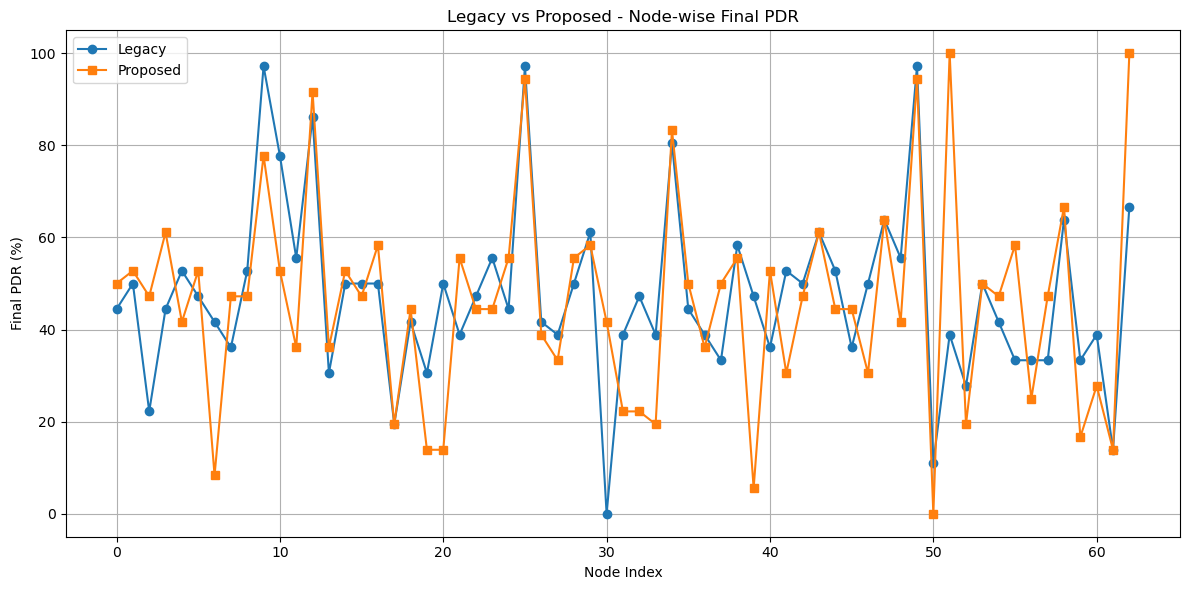

총 비교 노드 수       : 63
같은 PDR 노드 수     : 5
제안기법이 높은 노드 : 26
Legacy가 높은 노드   : 32


In [16]:
import matplotlib.pyplot as plt
import numpy as np

lpdr_path = r"C:\Users\Choe JongHyeon\Desktop\Applied Science\시뮬레이션 결과\Log\2025_07_14_AppSci_AODV_V10\L\D400\S30\N\PDR.txt"
ppdr_path = r"C:\Users\Choe JongHyeon\Desktop\Applied Science\시뮬레이션 결과\Log\2025_07_14_AppSci_AODV_V10\P\D400\S30\N\PDR.txt"

def extract_last_values_before_20(filepath):
    final_values = []
    with open(filepath, 'r', encoding='utf-8') as f:
        prev_value = None
        for line in f:
            if ':' in line:
                time_str, value_str = line.strip().split(':')
                time = int(time_str.strip())
                value = value_str.strip()
                value = np.nan if value.lower() == 'nan' else float(value)
                if time == 20:
                    if prev_value is not None:
                        final_values.append(prev_value)
                prev_value = value
        if prev_value is not None:
            final_values.append(prev_value)
    return final_values

lpdr = extract_last_values_before_20(lpdr_path)
ppdr = extract_last_values_before_20(ppdr_path)

min_len = min(len(lpdr), len(ppdr))
lpdr = lpdr[:min_len]
ppdr = ppdr[:min_len]
nodes = list(range(min_len))

plt.figure(figsize=(12, 6))
plt.plot(nodes, lpdr, label="Legacy", marker='o', linestyle='-')
plt.plot(nodes, ppdr, label="Proposed", marker='s', linestyle='-')
plt.xlabel("Node Index")
plt.ylabel("Final PDR (%)")
plt.title("Legacy vs Proposed - Node-wise Final PDR")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

same = 0
proposed_higher = 0
legacy_higher = 0

for l, p in zip(lpdr, ppdr):
    if np.isnan(l) or np.isnan(p):
        continue
    if abs(l - p) < 1e-6:
        same += 1
    elif p > l:
        proposed_higher += 1
    else:
        legacy_higher += 1

print(f"총 비교 노드 수       : {min_len}")
print(f"같은 PDR 노드 수     : {same}")
print(f"제안기법이 높은 노드 : {proposed_higher}")
print(f"Legacy가 높은 노드   : {legacy_higher}")
